# Assignment 07

In [ ]:
# import the data
# sep x,y
# find out the coef , intercept
# y = m1*x1 + m2*x2 + m3*x3 + c

#KNN Regressor


# calculate r2_score
#compared

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('insurance data.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:ylabel='Count'>

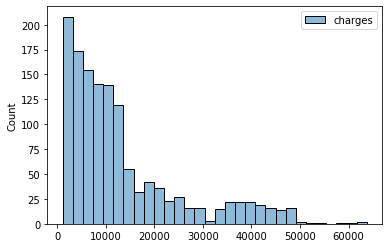

In [9]:
sns.histplot(df[['charges']])

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df.sex = le.fit_transform(df.sex)

In [12]:
df.smoker = le.fit_transform(df.smoker)

In [13]:
df.region = le.fit_transform(df.region)

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
x = df.drop('charges', axis=1)
y = df[['charges']]

In [18]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [19]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [22]:
from sklearn.model_selection import train_test_split as tts
xtest, xtrain, ytest, ytrain = tts(x,y,test_size=.30, random_state=1)

In [23]:
xtrain.head()

,age,sex,bmi,children,smoker,region
559,19,1,35.53,0,0,1
1087,57,1,31.54,0,0,1
1020,51,1,37.00,0,0,3
460,49,0,36.63,3,0,2
802,21,1,22.30,1,0,3


In [24]:
ytrain.head()

,charges
559,1646.4297
1087,11353.2276
1020,8798.5930
460,10381.4787
802,2103.0800


In [25]:
from sklearn.linear_model import LinearRegression
lrg = LinearRegression()

In [26]:
lrg.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
# find out the coef , intercept
# y = m1*x1 + m2*x2 + m3*x3 + c

In [30]:
m = lrg.coef_
m

array([[  268.70859924,   259.83579797,   365.20558795,   786.97647141,
        23254.08479256,  -436.91203783]])

In [31]:
c = lrg.intercept_
c

array([-13718.86188056])

In [38]:
pred = lrg.predict(xtest)
pred

array([[ 9.18457142e+03],
       [ 1.04168658e+03],
       [ 2.83437941e+03],
       [ 1.14878628e+04],
       [ 1.42200147e+04],
       [ 8.09097402e+03],
       [ 2.69470744e+04],
       [ 3.58801994e+04],
       [ 2.61723415e+03],
       [-1.91500298e+02],
       [ 1.39052391e+04],
       [ 2.53075144e+04],
       [ 1.11525430e+04],
       [ 1.49785943e+04],
       [ 4.93662452e+03],
       [-5.74090805e+02],
       [ 9.93763649e+03],
       [ 2.11533797e+03],
       [ 8.69631727e+03],
       [ 1.22916971e+04],
       [ 3.78000455e+03],
       [ 5.72166512e+03],
       [ 6.00777481e+03],
       [ 2.29538913e+04],
       [-2.43322817e+03],
       [ 6.75862973e+02],
       [ 1.57952580e+04],
       [ 2.60693038e+04],
       [ 2.94012458e+04],
       [ 3.91173173e+03],
       [ 4.02939236e+03],
       [ 1.00763527e+04],
       [ 1.11643120e+04],
       [ 1.26224596e+04],
       [ 1.59781690e+04],
       [ 7.09071530e+03],
       [ 1.79529275e+04],
       [ 9.10908665e+03],
       [ 1.2

In [36]:
lrg.score(xtest,ytest)

0.7498514965141443

In [68]:
from sklearn.metrics import r2_score
LRG = r2_score(ytest, pred)

In [69]:
LRG

0.7498514965141443

# KNN Regressor

In [92]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=10)

In [93]:
neigh.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=10)

In [94]:
kpred = neigh.predict(xtest)
kpred

array([[15455.086656],
       [ 6575.38944 ],
       [ 8013.779122],
       [13750.799808],
       [20491.485835],
       [15221.499649],
       [ 9481.162214],
       [19878.119468],
       [11602.001285],
       [ 3466.805445],
       [12457.8307  ],
       [ 6992.508481],
       [21675.393315],
       [12743.467967],
       [ 8561.326159],
       [ 1934.10882 ],
       [17346.360172],
       [ 9661.1708  ],
       [24715.792712],
       [23460.33786 ],
       [ 7127.815567],
       [19723.080433],
       [ 8332.22859 ],
       [ 3492.93734 ],
       [ 3207.339845],
       [ 4990.333345],
       [19466.815672],
       [11554.63266 ],
       [10919.454665],
       [ 5772.920888],
       [12082.345618],
       [13808.057311],
       [14922.732677],
       [14006.843735],
       [22721.902376],
       [21054.842592],
       [22807.785176],
       [11377.059365],
       [13314.644026],
       [10276.160664],
       [ 8686.1745  ],
       [ 6456.65292 ],
       [ 7449.855745],
       [149

In [95]:
neigh.score(xtest,ytest)

0.08541557168103864

In [96]:
KNN = r2_score(ytest, kpred)

In [97]:
KNN

0.08541557168103864

In [98]:
data={
    'Algorithm_name': ['Linear Regression', 'KNN Regressor'],
    'Accuracy': [LRG, KNN],
}
ds = pd.DataFrame(data)
ds

,Algorithm_name,Accuracy
0,Linear Regression,0.749851
1,KNN Regressor,0.085416


In [99]:
ds.nlargest(1,'Accuracy')

,Algorithm_name,Accuracy
0,Linear Regression,0.749851


In [100]:
import seaborn as sns
sns.set(color_codes=True)
from seaborn import barplot

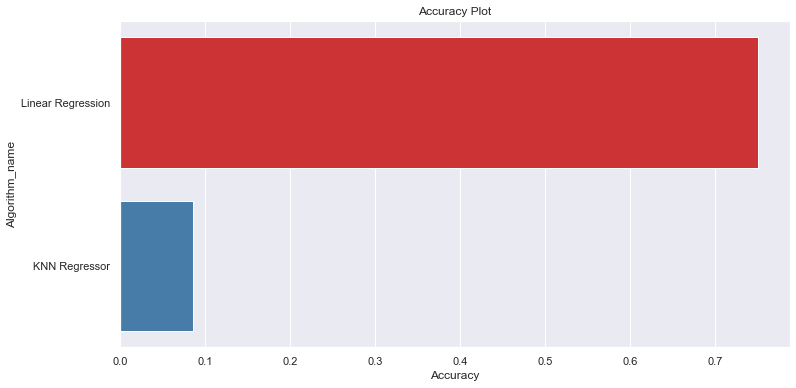

In [102]:
sns.set()
sns.barplot(y='Algorithm_name', x='Accuracy', data=ds, palette="Set1").set(title='Accuracy Plot')
sns.set(rc={'figure.figsize':(12,6)})